## Dicionário dos dados

[Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

## Analise dos dados

In [98]:
!pip install pandas numpy

In [99]:
import pandas as pd
import numpy as np

In [100]:
dados = pd.read_csv('Dados/Dados_totais.csv')
dados_gen = pd.read_csv('Dados/data_by_genres.csv')
dados_ano = pd.read_csv('Dados/data_by_year.csv')

dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

   explicit                      id  instrumentalness  key  liveness  \
0         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   

   loudness  mode         name  popularity  speechiness    tempo  \
0    -7.227     1       Yellow          84       0.0281  173.372   
1    -5.946     0  Ms. Jackson          80       0.2690   94.948   

            artists_song  
0      Coldplay - Yellow  
1  OutKast - Ms. Jackson

In [101]:
dados.shape

(20311, 19)

In [102]:
dados.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [103]:
dados = dados.drop(['explicit', 'key', 'mode'], axis=1)

In [104]:
dados.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [105]:
dados.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [106]:
dados_gen.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7

In [107]:
dados_gen = dados_gen.drop(['key', 'mode'], axis=1)

In [108]:
dados_gen.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [109]:
dados_gen.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [110]:
dados_ano.head()

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   
3     1  1924      0.940200      0.549894  191046.707627  0.344347   
4     1  1925      0.962607      0.573863  184986.924460  0.278594   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2          0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   
3          0.581701  0.235219 -14.231343     0.092089  120.689572  0.663725   
4          0.418297  0.237668 -14.146414     0.111918  115.521921  0.621929   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  
4    2.604317    5

In [111]:
dados_ano.year.unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020], dtype=int64)

In [112]:
dados_ano = dados_ano[dados_ano['year']>=2000]
dados_ano.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [113]:
dados_ano = dados_ano.drop(['key', 'mode'], axis=1)
dados_ano.head(2)

year  acousticness  danceability    duration_ms    energy  \
79  2000      0.289323      0.590918  242724.642638  0.625413   
80  2001      0.286842      0.583318  240307.796010  0.626986   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
79          0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
80          0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   

    popularity  
79   46.684049  
80   48.750125

In [114]:
dados_ano.reset_index()

index  year  acousticness  danceability    duration_ms    energy  \
0      79  2000      0.289323      0.590918  242724.642638  0.625413   
1      80  2001      0.286842      0.583318  240307.796010  0.626986   
2      81  2002      0.282624      0.576160  239503.283000  0.641270   
3      82  2003      0.256471      0.575763  244670.575230  0.660165   
4      83  2004      0.280559      0.567680  237378.708037  0.648868   
5      84  2005      0.255764      0.572281  237229.588205  0.653209   
6      85  2006      0.279986      0.568230  234042.914359  0.650326   
7      86  2007      0.254081      0.563414  241049.962564  0.668305   
8      87  2008      0.249192      0.579193  240107.315601  0.671461   
9      88  2009      0.261929      0.564190  238140.013265  0.670749   
10     89  2010      0.242687      0.572488  242811.804563  0.681778   
11     90  2011      0.273183      0.552867  236998.787308  0.648301   
12     91  2012      0.249953      0.570882  245807.457584  0.656571   
13     92  2013      0.257488      0.571148  242267.661437  0.645597   
14     93  2014      0.249313      0.589948  233728.314713  0.648795   
15     94  2015      0.253952      0.593774  230029.046606  0.627064   
16     95  2016      0.284171      0.600202  221396.510295  0.592855   
17     96  2017      0.286099      0.612217  211115.696787  0.590421   
18     97  2018      0.267633      0.663500  206001.007133  0.602435   
19     98  2019      0.278299      0.644814  201024.788096  0.593224   
20     99  2020      0.219931      0.692904  193728.397537  0.631232   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
0           0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
1           0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   
2           0.088048  0.193911 -7.686640     0.084308  119.239738  0.542397   
3           0.083049  0.196976 -7.485545     0.093926  120.914622  0.530504   
4           0.077934  0.202199 -7.601655     0.094239  121.290346  0.524489   
5           0.090194  0.190082 -7.466159     0.093334  121.617967  0.532531   
6           0.077701  0.188289 -7.265501     0.085847  121.798615  0.520028   
7           0.072957  0.196127 -7.044536     0.084347  124.087516  0.516794   
8           0.063662  0.198431 -6.843804     0.077356  123.509934  0.527542   
9           0.075872  0.205252 -7.046015     0.085458  123.463808  0.507170   
10          0.082981  0.199701 -6.909904     0.081031  123.570215  0.520895   
11          0.103772  0.203309 -7.574986     0.087479  121.483997  0.472454   
12          0.085206  0.189733 -7.260550     0.081742  121.781736  0.462709   
13          0.098365  0.199631 -7.472039     0.093849  120.806829  0.454741   
14          0.076570  0.191822 -7.067440     0.084061  122.305263  0.463049   
15          0.106787  0.188856 -7.625639     0.096779  120.115411  0.432098   
16          0.093984  0.181170 -8.061056     0.104313  118.652630  0.431532   
17          0.097091  0.191713 -8.312630     0.110536  117.202740  0.416476   
18          0.054217  0.176326 -7.168785     0.127176  121.922308  0.447921   
19          0.077640  0.172616 -7.722192     0.121043  120.235644  0.458818   
20          0.016376  0.178535 -6.595067     0.141384  124.283129  0.501048   

    popularity  
0    46.684049  
1    48.750125  
2    48.655500  
3    48.626407  
4    49.273143  
5    50.953333  
6    51.313846  
7    51.075897  
8    50.630179  
9    51.440816  
10   52.730159  
11   53.307387  
12   52.655013  
13   54.047065  
14   55.543142  
15   56.700608  
16   59.647190  
17   63.263554  
18   63.296243  
19   65.256542  
20   64.301970

## Análise gráfica

In [115]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [116]:
import plotly.express as px

In [117]:
fig = px.line(dados_ano, x='year', y='loudness', markers=True, title='Variação do loudness')
fig.show()

In [118]:
import plotly.graph_objects as go

In [119]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_ano.year, y=dados_ano.acousticness, name='Acouticness'))
fig.add_trace(go.Scatter(x=dados_ano.year, y=dados_ano.valence, name='Valence'))
fig.add_trace(go.Scatter(x=dados_ano.year, y=dados_ano.danceability, name='Danceability'))
fig.add_trace(go.Scatter(x=dados_ano.year, y=dados_ano.energy, name='Energy'))
fig.add_trace(go.Scatter(x=dados_ano.year, y=dados_ano.instrumentalness, name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados_ano.year, y=dados_ano.liveness, name='liveness'))
fig.add_trace(go.Scatter(x=dados_ano.year, y=dados_ano.speechiness, name='Speechiness'))

fig.show()

In [120]:
fig = px.imshow(dados.corr(), text_auto=True)
fig.show()

# Clusterização por gênero

## PCA e SdandartScaler

In [121]:
dados_gen.shape

(2973, 12)

In [122]:
dados_gen.genres.value_counts().sum()

2973

Como temos uma grande variedade de gêneros, 2973 ao todo, e todos estão em formato de string que não é aceito por modelos de machine learning, precisamos aplicar algum tipo de encoding, que é basicamente fazer com que essas palavras virem valores numéricos e façam sentido para a nossa máquina. O modo que vamos fazer é utilizando o **get_dummies**, que é bem semelhante ao OneHotEncoder, mas muito mais fácil de aplicar já que podemos utilizar direto da biblioteca do Pandas.


In [123]:
dados_gen1 = dados_gen.drop('genres', axis=1)
dados_gen1.head()

acousticness  danceability   duration_ms    energy  instrumentalness  \
0      0.979333      0.162883  1.602977e+05  0.071317          0.606834   
1      0.494780      0.299333  1.048887e+06  0.450678          0.477762   
2      0.762000      0.712000  1.151770e+05  0.818000          0.876000   
3      0.651417      0.529093  2.328809e+05  0.419146          0.205309   
4      0.676557      0.538961  1.906285e+05  0.316434          0.003003   

   liveness   loudness  speechiness       tempo   valence  popularity  
0  0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333  
1  0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000  
2  0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000  
3  0.218696 -12.288965     0.107872  112.857352  0.513604   20.859882  
4  0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071

Agora vamos utilizar vários conceitos em um processo de pipeline, então a primeira coisa que vamos fazer é importar o método **Pipeline** do [sklearn.pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) e esse método faz literalmente uma pipeline de machine learning, mas de uma forma automática, onde aplica sequencialmente uma lista de transformações até um resultado final. Então o que precisamos passar é o que a nossa pipeline vai fazer, como o primeiro passo e o que queremos de resultado final dela.

Neste ponto, onde fizemos os nossos dummies anteriormente com os gêneros, precisamos reduzir a dimensionalidade da tabela que está com milhares de colunas, porém se utilizarmos um processo de redução diretamente, sem fazer a padronização dos dados na parte de pré processamento, os resultados ficarão totalmente desbalanceados, trazendo maior peso para as variáveis que tem uma amplitude maior, como por exemplo o **loudness** em relação às outras variáveis que compõe a música.

Para resolver esse problema, o primeiro passo da pipeline vai ser usar o [**StandardScaler**](https://scikit-learn.org/stable/modules/preprocessing.html) para trazer essa normalização e redução de escala para que no próximo passo seja feita a redução de dimensionalidade com um método de decomposição, no nosso caso vamos escolher o PCA.

PCA significa Análise de componentes principais e ele trás consigo uma série de análises matemáticas que são feitas para que possamos transformar aquelas milhares de colunas que temos em uma quantidade menor, com um valor n que escolhermos, porém, quanto mais colunas a gente tem no dataset original e menos colunas queremos no dataset final, o aprendizado depois pode ser prejudicado.

Na parte **n_components** podemos colocar a quantidade de % de explicação que queremos que o algoritmo tenha no final, como por exemplo 0.3, que seria 30%, ou um valor como por exemplo um valor X de colunas.


In [124]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Depois de feita a pipeline, vamos salvar em um arquivo chamado projection, com as colunas x e y, que são as posições dos pontos na cluster.

In [125]:
SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])

In [126]:
genre_embedding_pca = pca_pipeline.fit_transform(dados_gen1)
projection = pd.DataFrame(columns=['x','y'], data=genre_embedding_pca)

projection.head()

x         y
0  5.910268 -0.011146
1  2.787093  4.498483
2 -0.757538 -1.258495
3  1.020521 -0.931690
4  0.753911 -0.999861

## K-Means

In [127]:
from sklearn.cluster import KMeans

Depois de fazer a normalização e redução de dimensionalidade,conseguimos gerar os pontos de x e y que temos

In [128]:
k_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)

k_pca.fit(projection)

dados_gen['cluster_pca'] = k_pca.predict(projection)
projection['cluster_pca'] = k_pca.predict(projection)

Initialization complete
Iteration 0, inertia 4523.567815543697
Iteration 1, inertia 3668.985552156033
Iteration 2, inertia 3624.7309257118277
Iteration 3, inertia 3602.4958137588205
Iteration 4, inertia 3588.0607912404935
Iteration 5, inertia 3575.4395702593138
Iteration 6, inertia 3566.3761311630315
Iteration 7, inertia 3562.591728457508
Iteration 8, inertia 3560.314467700937
Iteration 9, inertia 3558.885495152658
Iteration 10, inertia 3558.002748934055
Iteration 11, inertia 3557.7295547755034
Converged at iteration 11: center shift 9.319981044865263e-05 within tolerance 0.0002709886847099653.
Initialization complete
Iteration 0, inertia 3650.5166847646656
Iteration 1, inertia 3552.8915365648154
Iteration 2, inertia 3528.9425421232227
Iteration 3, inertia 3518.8491320487283
Iteration 4, inertia 3512.6717916139796
Iteration 5, inertia 3509.1741078247487
Iteration 6, inertia 3506.388333551391
Iteration 7, inertia 3505.091074309417
Iteration 8, inertia 3504.646511738498
Converged at iter

In [129]:
projection.head()

x         y  cluster_pca
0  5.910268 -0.011146            3
1  2.787093  4.498483            3
2 -0.757538 -1.258495            4
3  1.020521 -0.931690            1
4  0.753911 -0.999861            1

In [130]:
projection['genres'] = dados_gen['genres']
projection.head()

x         y  cluster_pca                  genres
0  5.910268 -0.011146            3  21st century classical
1  2.787093  4.498483            3                   432hz
2 -0.757538 -1.258495            4                   8-bit
3  1.020521 -0.931690            1                      []
4  0.753911 -0.999861            1              a cappella

## Plotando a clustering

In [131]:
fig = px.scatter(
    projection, x='x', y='y', color='cluster_pca', hover_data=['x','y','genres'])
fig.show()

In [132]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.4927066994726645

In [133]:
pca_pipeline[1].explained_variance_.sum()

5.421597305805701

## Redução de dimensionalidade com PCA

In [134]:
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [135]:
dados.artists.value_counts()

Drake                      170
Taylor Swift               156
Eminem                     147
Kanye West                 136
BTS                        122
                          ... 
Macklemore & Ryan Lewis      7
Monchy & Alexandra           7
The Living Tombstone         7
Empire of the Sun            6
Nelly Furtado                6
Name: artists, Length: 875, dtype: int64

In [136]:
dados.artists_song.value_counts()

Christina Aguilera - You Lost Me                                  1
Morgan Wallen - Livin’ The Dream                                  1
U2 - Kite                                                         1
Bad Bunny - MIA (feat. Drake)                                     1
Glee Cast - My Life Would Suck Without You (Glee Cast Version)    1
                                                                 ..
BTS - Best Of Me                                                  1
Jack Johnson - You And Your Heart                                 1
Lana Del Rey - Lust For Life (with The Weeknd)                    1
Grupo Laberinto - Campos De Amapola                               1
AFI - Miss Murder                                                 1
Name: artists_song, Length: 20311, dtype: int64

In [137]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [138]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()

dados2 = dados.drop('artists', axis=1)

dados_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names(['artists']))], axis=1)
dados_dummies

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

                           id  instrumentalness  liveness  loudness  ...  \
0      3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1      0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   
2      60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870  ...   
3      6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708  ...   
4      3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244  ...   
...                       ...               ...       ...       ...  ...   
20306  0PUkanqCGTb6qseXPKOw1F          0.000000    0.1020    -8.121  ...   
20307  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    0.1770    -8.689  ...   
20308  308prODCCD0O660tIktbUi          0.022500    0.1250    -8.480  ...   
20309  2f8y4CuG57UJEmkG3ujd0D          0.000015    0.1080   -10.991  ...   
20310  5SiZJoLXp3WOl3J4C8IK0d          0.000008    0.6430    -7.161  ...   

      artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                        0             0              0                  0   
1                        0             0              0                  0   
2                        0             0              0                  0   
3                        0             0              0                  0   
4                        0             0              0                  0   
...                    ...           ...            ...                ...   
20306                    0             0              0                  0   
20307                    0             0              0                  0   
20308                    0             0              0                  0   
20309                    0             0              0                  0   
20310                    0             0              0                  0   

      artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                     0                 0                           0   
1                     0                 0                           0   
2                     0                 0                           0   
3                     0                 0                           0   
4                     0                 0                           0   
...                 ...               ...                         ...   
20306                 0                 0                           0   
20307                 0                 0                           0   
20308                 0                 0                           0   
20309                 0                 0                           0   
20310                 0                 0                           0   

       artists_fun.  artists_girl in red  artists_iann dior  
0                 0                    0                  0  
1                 0                    0                  0  
2                 0                    0                  0  
3                 0                    0                  0  
4                 0                    0                  0  
...             ...            

In [139]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])

music_embedding_pca = pca_pipeline.fit_transform(dados_dummies.drop(['artists_song', 'id','name'], axis=1))

projection_m = pd.DataFrame(data=music_embedding_pca)

## Aplicação do cluster com K-Means

In [140]:
k_pca_pipeline = KMeans(n_clusters=50, verbose=False, random_state=SEED)

k_pca_pipeline.fit(projection_m)

dados['cluster_pca'] = k_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = k_pca_pipeline.predict(projection_m)

In [141]:
projection_m['artists'] = dados.artists
projection_m['song'] = dados.artists_song

projection_m.head()

0         1         2         3         4         5         6  \
0  0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1 -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2 -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3 -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4 -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   

          7         8         9  ...       605       606       607       608  \
0 -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027 -0.032617   
1  0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322 -0.030234   
2  1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979 -0.012781   
3  1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148 -0.040911   
4  0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478 -0.010033   

            609           610           611  cluster_pca       artists  \
0  5.980431e-12  1.761763e-13  3.038265e-12            0      Coldplay   
1  5.777889e-12  5.874946e-12  6.111051e-12            0       OutKast   
2  2.242047e-12 -1.840098e-12  6.032015e-13            0   Linkin Park   
3  1.633782e-11  8.823384e-12 -1.067368e-11            0  3 Doors Down   
4  1.755780e-12  1.506540e-12  3.965346e-12            0        Eminem   

                           song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady  

[5 rows x 615 columns]

## Analisando o cluster

In [142]:
fig = px.scatter(projection_m, x=0,y=1, color='cluster_pca', hover_data=[0,1, 'song'])
fig.show()

In [143]:
fig = px.scatter_3d(
   projection_m, x=0, y=1, z=2, color='cluster_pca',hover_data=['song'])
fig.update_traces(marker_size = 2)
fig.show()

In [144]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.7000008463187031

# Sistemas de Recomendação

## Recomendação da música

In [145]:
nome_musica = 'Led Zeppelin - Kashmir - Remaster'

In [146]:
from sklearn.metrics.pairwise import euclidean_distances

cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]

musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]

distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias'] = distancias

recomendadas = musicas_recomendadas.sort_values('distancias')
recomendadas.head()

0         1                                   song  \
10542  1.188395  1.947280      Led Zeppelin - Kashmir - Remaster   
10197  1.171077  1.970253  The Black Keys - Midnight in Her Eyes   
852    1.255521  1.956494                         TOOL - The Pot   
6252   1.121287  1.930351  Metalocalypse: Dethklok - Face Fisted   
12309  1.269538  1.935492              Bright Eyes - Road To Joy   

                           id  distancias  
10542  5v2vkoTamoisazJFanHJjk    0.000000  
10197  2l8qA0PtOz6JLMzxMnKOaO    0.028769  
852    1lATXTBJDHwawvT1UfxWu3    0.067756  
6252   5tvdxJ8JpA9u4lKsLcUYKL    0.069210  
12309  1PW6GA54DjaQDwKU4ATCDE    0.081995

## Biblioteca Spotipy

In [147]:
pip install spotipy

In [148]:
pip install python-dotenv

In [149]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import os
from dotenv import load_dotenv

In [150]:
load_dotenv()  # Carrega o .env automaticamente

scope = 'user-library-read playlist-modify-private'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    scope=scope,
    redirect_uri=os.getenv("SPOTIPY_REDIRECT_URI"),
    client_id=os.getenv("SPOTIPY_CLIENT_ID"),
    client_secret=os.getenv("SPOTIPY_CLIENT_SECRET")
))

In [151]:
# Pega os valores REAIS do .env
client_id = os.getenv("SPOTIPY_CLIENT_ID")
client_secret = os.getenv("SPOTIPY_CLIENT_SECRET")

# Passa os valores reais para o ClientCredentials
ccm = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=ccm)

## Imagem do álbum

In [152]:
import matplotlib.pyplot as plt
from skimage import io

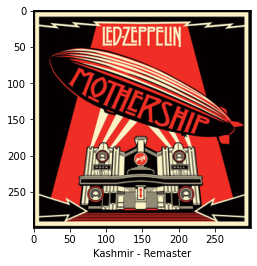

In [153]:
id = dados[dados['artists_song']== nome_musica]['id'].iloc[0]
track = sp.track(id)
url = track['album']['images'][1]['url']
name = track['name']

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize=10)
plt.show()

# Recomendador

## Buscando os dados da playlist

In [154]:
def recommend_id(playlist_id):
  url=[]
  name=[]
  artists = []
  duracao = []
  for i in playlist_id:
    track = sp.track(i)
    url.append(track['album']['images'][1]['url'])
    name.append(track['name'])
    artists.append(track["artists"][0]["name"])
    duracao.append(round(track["duration_ms"]/60000, 2))
  return name, url, artists, duracao

In [155]:
recomendadas = recomendadas.head(10)
name, url, artists, duracao = recommend_id(recomendadas['id'])

In [156]:
name, url, artists, duracao

(['Kashmir - Remaster',
  'Midnight in Her Eyes',
  'The Pot',
  'Face Fisted',
  'Road To Joy',
  'Gravity',
  'I Wish - Remix (To the Homies That We Lost)',
  'Stellar - Acoustic',
  'Flutter',
  'Take It to the Limit - 2013 Remaster'],
 ['https://i.scdn.co/image/ab67616d00001e0222f1b6c28ce5735646b2e569',
  'https://i.scdn.co/image/ab67616d00001e029e77e076882eb529a3c16112',
  'https://i.scdn.co/image/ab67616d00001e02781369aabc39c792cc55604f',
  'https://i.scdn.co/image/ab67616d00001e02533644c194069d80a08109cf',
  'https://i.scdn.co/image/ab67616d00001e02d5edf0a2f87a3a6ce19c48e7',
  'https://i.scdn.co/image/ab67616d00001e029fce7baa218063d99799ce52',
  'https://i.scdn.co/image/ab67616d00001e02773c978c2e5c32ecf2550bbd',
  'https://i.scdn.co/image/ab67616d00001e021908e07581a7c1e3518a1a40',
  'https://i.scdn.co/image/ab67616d00001e02e1b37418c6d42c0f5ca27a69',
  'https://i.scdn.co/image/ab67616d00001e02061849da201f99053bf5e788'],
 ['Led Zeppelin',
  'The Black Keys',
  'TOOL',
  'Metalocal

## Gerando as imagens da playlist

In [157]:
def visualize_songs(name,url):

    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 8)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.tick_params(bottom = False)
        plt.grid(visible=None)
    plt.show()

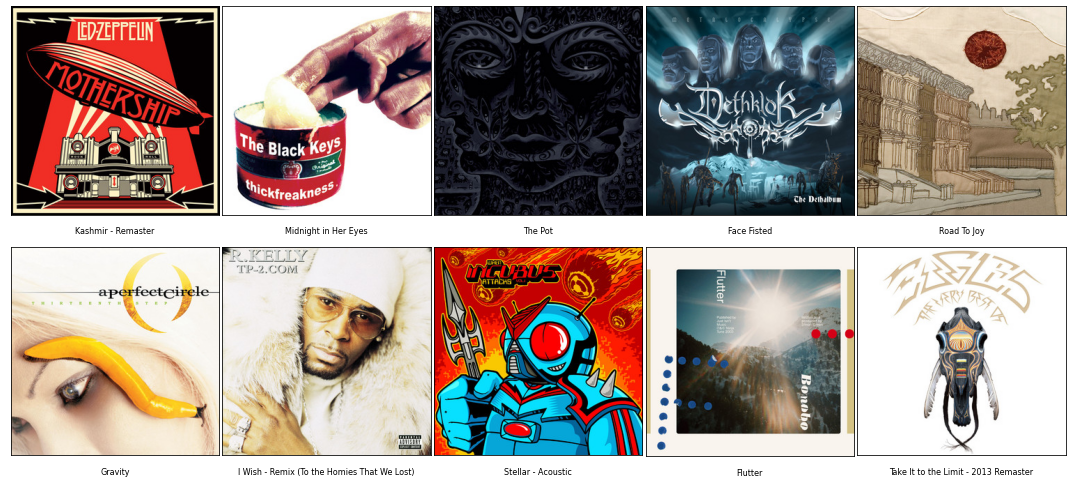

In [158]:
visualize_songs(name, url)

## Fazendo uma função final

In [159]:
def recomendador(nome_musica):

## Calculando as distâncias
  cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
  musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
  x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
  y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]
  distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
  musicas_recomendadas['id'] = dados['id']
  musicas_recomendadas['distancias'] = distancias
  recomendada = musicas_recomendadas.sort_values('distancias').head(10)

  # ## Acessando os dados de cada música com a biblioteca Spotipy (nome e imagem)
  playlist_id = recomendada['id']

  url = []
  name = []
  for i in playlist_id:
      track = sp.track(i)
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

# ## Plotando as figuras
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      plt.tick_params(bottom = False)
  plt.show()


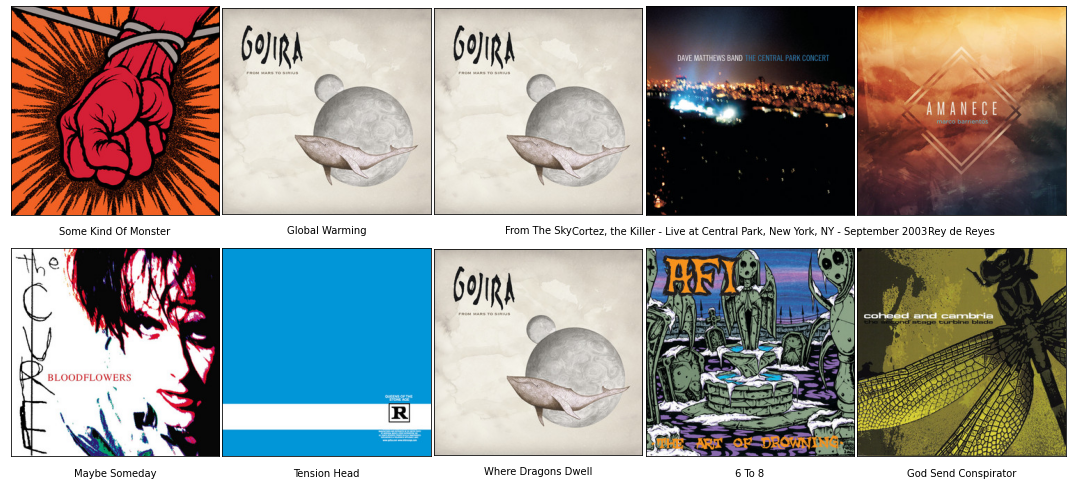

In [160]:
recomendador('Metallica - Some Kind Of Monster')